In [1]:
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
#k1 = 1         k2 = 2          phi_in = 1      phi_out = 2     v = 10          km = 1          klanda = 1      alpha*beta
#constants[0]   constants[1]    constants[2]    constants[3]    constants[4]    constants[5]    constants[6]    constants[7]  

#Valores estimados de las constantes MEAN
#const_mean = [ 0.09350985, 0.58026128, 0.43635995, 0.54207802, -0.45358854, 0.6839959, 0.36064184, 0.65045037]
const_mean = [0.64403665, 2.04953861, 0.30205504, 0.34651345, 1.52979939, 1.71869996, 3.31121888, 1.10105449]
k1 ,k2, phi_in ,phi_out , v , km , klanda , alphaBeta = const_mean
print(klanda)

3.31121888


In [3]:
def model1(t, variables, n, k1, k2, phi_in, phi_out, A_out, v, km, klanda, landa0):
    P, A = variables
    alpha = landa0/(1+klanda*A) #A initial o A a lo largo del tiempo(FUERA O DENTRO)
    dPdt = alpha*n*(1+k2)/((1+k1*A)**2*(1+k2*P)) - alpha*P
    dAdt = phi_in*A_out - phi_out*A - v*P*A/(km+P) - alpha*A
    return [dPdt, dAdt]


def model2(t, variables, n, k1, k2, phi_in, phi_out, A_out, v, km, klanda, landa0, alphaBeta):
    P, A = variables
    landa = landa0/(1+klanda*A) #A initial o A a lo largo del tiempo(FUERA O DENTRO)
    dPdt = alphaBeta*n/(((1+k1*A)**2)*(1+k2*P)) - landa*P
    dAdt = phi_in*A_out - phi_out*A - v*P*A/(km+P) - landa*A
    return [dPdt, dAdt]




In [4]:
def computeAPnaout(model,n_values,Aout_values,landa0,const_mean,tf,initial_conditions,equidist):
    k1 ,k2, phi_in ,phi_out , v , km , klanda , alphaBeta = const_mean
    t_span = [0, tf]
    
    #P_n_aout = np.zeros((len(Aout_values), len(n_values))) #x=Aout//y = n
    #A_n_aout = np.zeros((len(Aout_values), len(n_values))) #x=Aout//y = n

    P_n_aout = []
    A_n_aout = []

    for i in range(0,len(Aout_values)):
        Pcurrent = []
        Acurrent = []
        for j in range(0,len(n_values)):
            sol = solve_ivp(model2, t_span, initial_conditions, args=(n_values[j],k1,k2, phi_in, phi_out, Aout_values[i], v, km, klanda, landa0, alphaBeta), t_eval=np.linspace(0, tf, equidist))
            #print(i,j)
            Pcurrent.append(sol.y[0])
            Acurrent.append(sol.y[1])
        P_n_aout.append(Pcurrent)
        A_n_aout.append(Acurrent)
    return(P_n_aout,A_n_aout)


def computeAPnaout_equilibrium(model,n_values,Aout_values,landa0,const_mean,tf,initial_conditions,equidist):
    k1 ,k2, phi_in ,phi_out , v , km , klanda , alphaBeta = const_mean
    t_span = [0, tf]
    
    P_n_aout = np.zeros((len(Aout_values), len(n_values))) #x=Aout//y = n
    A_n_aout = np.zeros((len(Aout_values), len(n_values))) #x=Aout//y = n

    for i in range(0,len(Aout_values)):
        for j in range(0,len(n_values)):
            sol = solve_ivp(model2, t_span, initial_conditions, args=(n_values[j],k1,k2, phi_in, phi_out, Aout_values[i], v, km, klanda, landa0, alphaBeta), t_eval=np.linspace(0, tf, equidist))
            #print(i,j)
            P_n_aout[i,j] = sol.y[0][-1]
            A_n_aout[i,j] = sol.y[1][-1]
    return(P_n_aout,A_n_aout)



In [5]:
def Gfunction(A,landa0,klanda):
    return landa0/(1+klanda*A)

REPLICATOR MUTANT EQUATION

$$\dot {x_{i}}=x_{i}f_{i}(x)-x_{i} \, \Bigg[\sum_{k=1}^{N} \Bigg(G_k x_k + \sum_{j=1}^N \, M_{kj} \, x_j\Bigg) \, \Bigg] $$

1. Compute xi, fi and xifi
2. Solve replicator mutant equation


$$
M_{ij} = -\delta 
\begin{pmatrix}
1 & -2(1+\Delta) & 0 & \cdots & 0 \\
m_{21} & m_{22} & m_{23} & \cdots & 0 \\
0 & m_{32} & m_{33} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & m_{N-1,N-1} \\
0 & 0 & \cdots & -(N-1) & N(1+\Delta) \\
\end{pmatrix}, \quad \text{ where }
$$

$$
m_{ij} =
\begin{cases} 
-(i-1) & \text{si } j = i-1 \\
i(2+\Delta) & \text{si } i = j \\
-(i+1)(1+\Delta) & \text{si } j = i+1 \\
0 & \text{en otro caso}
\end{cases}
$$


In [6]:
deltaMin = 0.01
deltaMay = 6.4

Mij = -deltaMin * np.array([
    [1, -2*(1+deltaMay), 0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 2*(2+deltaMay), -3*(1+deltaMay), 0, 0, 0, 0, 0, 0, 0],
    [0, -2, 3*(2+deltaMay), -4*(1+deltaMay), 0, 0, 0, 0, 0, 0],
    [0, 0, -3, 4*(2+deltaMay), -5*(1+deltaMay), 0, 0, 0, 0, 0],
    [0, 0, 0, -4, 5*(2+deltaMay), -6*(1+deltaMay), 0, 0, 0, 0],
    [0, 0, 0, 0, -5, 6*(2+deltaMay), -7*(1+deltaMay), 0, 0, 0],
    [0, 0, 0, 0, 0, -6, 7*(2+deltaMay), -8*(1+deltaMay), 0, 0],
    [0, 0, 0, 0, 0, 0, -7, 8*(2+deltaMay), -9*(1+deltaMay), 0],
    [0, 0, 0, 0, 0, 0, 0, -8, 9*(2+deltaMay), -10*(1+deltaMay)],
    [0, 0, 0, 0, 0, 0, 0, 0, -9, 10*(1+deltaMay)],
])
print(np.shape(Mij))

(10, 10)


In [7]:
Mij[4]

array([-0.   , -0.   , -0.   ,  0.04 , -0.42 ,  0.444, -0.   , -0.   ,
       -0.   , -0.   ])

In [8]:
def f_i(x, i, Mij, A_n_aout, Aout, landa0, klanda):
    N = len(x)
    sum_term = 0
    for j in range(N):
        sum_term += Mij[i][j] * (x[j]/x[i])
    return Gfunction(A_n_aout[Aout][i],landa0,klanda) + sum_term


def modelxidot(t, x, Mij, A_n_aout, Aout, landa0, klanda):
    N = len(x)
    dxdt = np.zeros(N)
    
    for i in range(N):
        # Calculo de la primera parte de la ecuación: x_i * f_i(x)
        term1 = x[i] * f_i(x, i, Mij, A_n_aout, Aout, landa0, klanda)
        
        # Calculo de la segunda parte de la ecuación: x_i * [ ... ]
        sum1 = 0
        for k in range(N):
            inner_sum = 0
            for j in range(N):
                inner_sum += Mij[k][j] * x[j]
            sum1 += Gfunction(A_n_aout[Aout][k],landa0,klanda) * x[k] + inner_sum
        
        term2 = x[i] * sum1
        
        dxdt[i] = term1 - term2
    
    return dxdt


def modelxidot2(t, x, Mij, A_n_aout, Aout, landa0, klanda):
    N = len(x)
    dxdt = np.zeros(N)
    
    for i in range(N):
        # Calculo de la primera parte de la ecuación: x_i * f_i(x)
        term1 = x[i] * f_i(x, i, Mij, A_n_aout, Aout, landa0, klanda)
        
        # Calculo de la segunda parte de la ecuación: x_i * [ ... ]
        sum1 = 0
        for k in range(N):
            sum1 = sum1+ x[k]*f_i(x, k, Mij, A_n_aout, Aout, landa0, klanda)
        
        term2 = x[i] * sum1
        
        dxdt[i] = term1 - term2
    
    return dxdt

In [9]:
def x_if_i(x, i, Mij, A_n_aout, Aout, landa0, klanda,tt):
    N = len(x)
    sum_term = 0
    for j in range(N):
        sum_term += Mij[i][j] * x[j]
    return Gfunction(A_n_aout[Aout][i][tt],landa0,klanda)*x[i] + sum_term



def modelxidot3(t, x, Mij, A_n_aout, Aout, landa0, klanda):
    N = len(x)
    dxdt = np.zeros(N)
    
    tt = int(t)
    if tt >= len(A_n_aout[Aout][0]):
        tt = -1

    for i in range(N):
        # 1. x_i * f_i(x)
        term1 = x_if_i(x, i, Mij, A_n_aout, Aout, landa0, klanda,tt)
        
        # 2. x_i * [ SUM x_i * f_i(x) ]
        sum1 = 0
        for k in range(N):
            sum1 = sum1 + x_if_i(x, k, Mij, A_n_aout, Aout, landa0, klanda,tt)
        
        term2 = x[i] * sum1
        
        dxdt[i] = term1 - term2
    
    return dxdt

In [10]:
def computeModelxidot(tf,A_n_aout,Aout_values,initial_conditions,equidist,deltaMin,deltaMay,landa0,klanda):
    
    t_span = [0, tf]
    modelxi_solution = []
    for i in range(0,len(Aout_values)):
        sol = solve_ivp(modelxidot3,t_span,initial_conditions,args=(Mij, A_n_aout, i, landa0, klanda),t_eval=np.linspace(0, tf, equidist))
        modelxi_solution.append([sol.y[0],sol.y[1],sol.y[2],sol.y[3],sol.y[4],sol.y[5],sol.y[6],sol.y[7],sol.y[8],sol.y[9]])
    return(modelxi_solution)

In [11]:
def computePromPXI(P_n_aout,n_values,Aout_values,modelxi_solution,time):
    promP = np.zeros(len(Aout_values)) #x=Aout//y = n
    for i in range(0,len(Aout_values)):
        num = 0
        for j in range(0,len(n_values)):
            num = num + P_n_aout[i][j]*modelxi_solution[i][j][time]
        promP[i] = num
    return(promP)

def computePromPXI_time(P_n_aout,n_values,Aout_values,modelxi_solution,time):
    promP = np.zeros(len(Aout_values)) #x=Aout//y = n
    for i in range(0,len(Aout_values)):
        num = 0
        for j in range(0,len(n_values)):
            num = num + P_n_aout[i][j][time]*modelxi_solution[i][j][time]
        promP[i] = num
    return(promP)

In [12]:
n_values = np.linspace(1, 10, 10)
Aout_values = np.linspace(0, 50, 11)
landa0 = 0.43
tf = 168
equidist = 168
initial_conditions = [1, 0]  
P_n_aout,A_n_aout = computeAPnaout(model2,n_values,Aout_values,landa0,const_mean,tf,initial_conditions,equidist)
print(np.shape(P_n_aout))
print(np.shape(A_n_aout))


(11, 10, 168)
(11, 10, 168)


In [13]:
for a in range(0,len(Aout_values)):
    for n in range(0,len(n_values)):
        vector = P_n_aout[a][n]
        vector2 = A_n_aout[a][n]
        for i in range(0,7):
            vector = np.append(vector, P_n_aout[a][n])
            vector2 = np.append(vector2, A_n_aout[a][n])
        P_n_aout[a][n] = vector
        A_n_aout[a][n] = vector2

print(np.shape(P_n_aout))
print(np.shape(A_n_aout))

(11, 10, 1344)
(11, 10, 1344)


In [14]:
init = 0
initial_conditions = [1,init,init,init,init,init,init,init,init,init]
tf = 168
equidist = equidist
#initial_conditions = [init,init,init,init,init,init,init,init,init,init]
modelXi_solution = []
modelXi_solution = computeModelxidot(tf,A_n_aout,Aout_values,initial_conditions,equidist,deltaMin,deltaMay,landa0,klanda)


In [15]:
init = 0
initial_conditions = [1,init,init,init,init,init,init,init,init,init]

In [16]:
def normalize_modelXI(modelXi_solution):
    for a in range (0,len(Aout_values)):
        for t in range (0,equidist):
            sum = 0
            vec = []
            for i in range (0,len(n_values)):
                vec.append(modelXi_solution[a][i][t])
                sum = sum + modelXi_solution[a][i][t]
            #print(sum)
            #print(np.linalg.norm(vec))
            for i in range (0,len(n_values)):
                modelXi_solution[a][i][t] = modelXi_solution[a][i][t] / sum #np.linalg.norm(vec)
    return(modelXi_solution)

modelXi_solution = normalize_modelXI(modelXi_solution)

In [17]:
a = 2
for t in range (0,equidist):
    sum = 0
    for i in range (0,len(n_values)):
        sum = sum + modelXi_solution[a][i][t]
    print(sum)

1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0
0.9999999999999998
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999997
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999997
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999


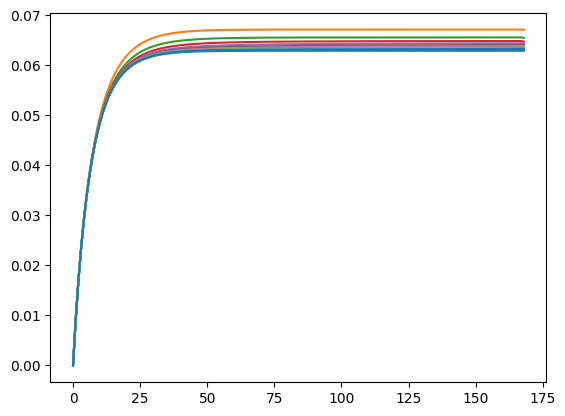

In [18]:
plt.figure()
for a in range (0,len(Aout_values)):
    n = 1
    plt.plot(np.linspace(0, tf, equidist),modelXi_solution[a][n])

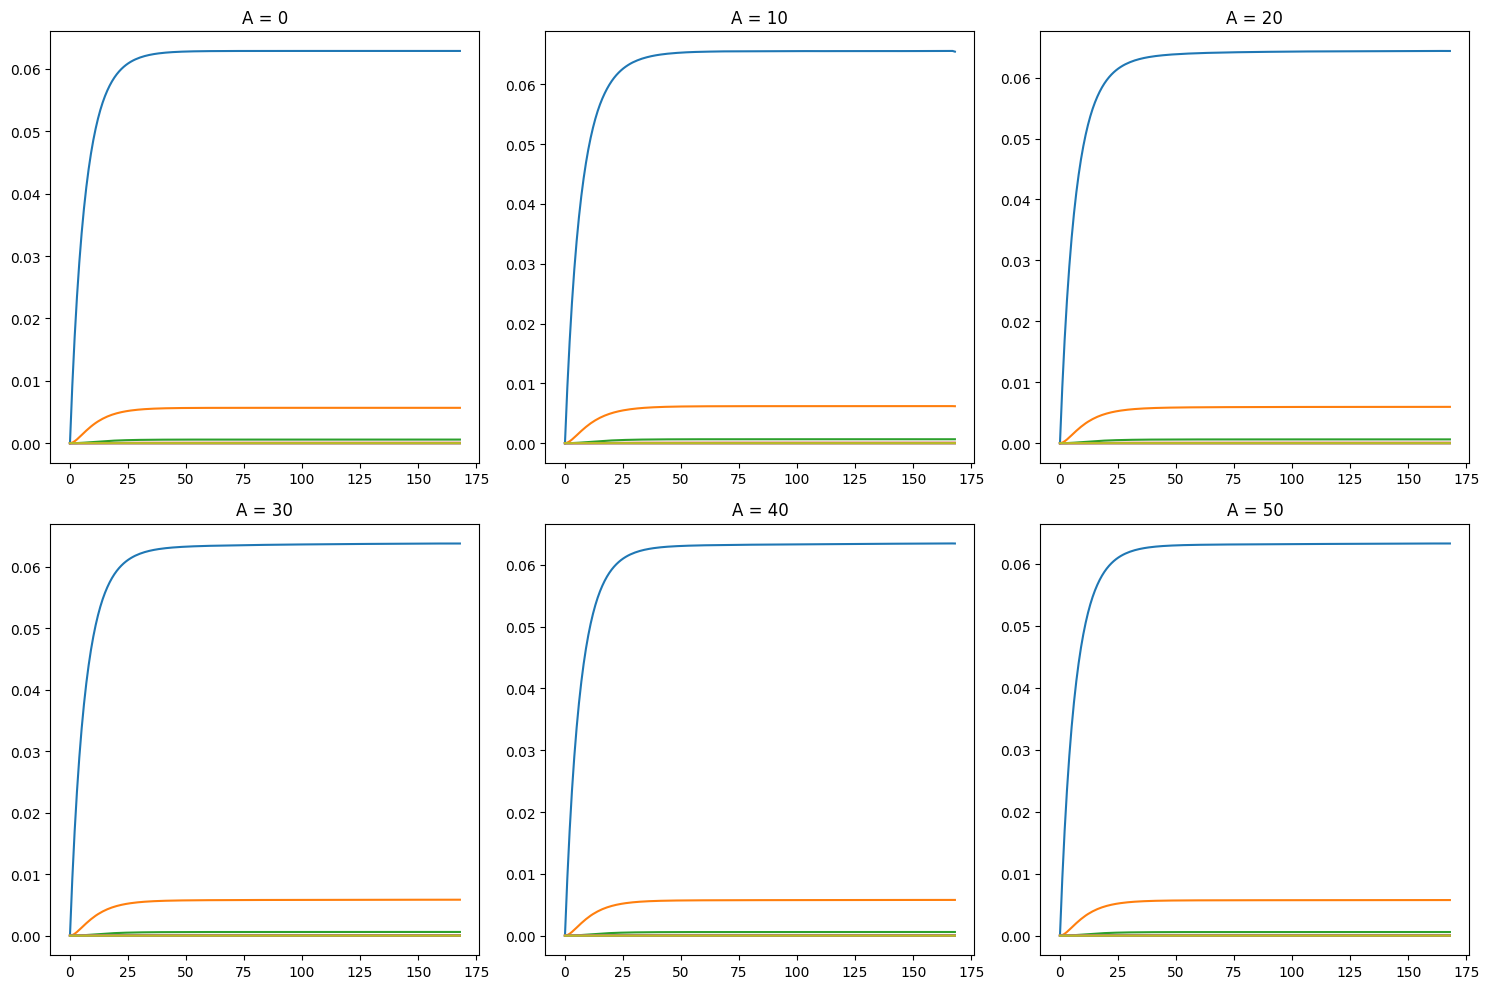

In [19]:
# Crear una figura y conjunto de subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

i = 0
for a in range (0,6,2):
    
    for n in range (1,len(n_values)):
        
        axs[0, i].plot(np.linspace(0, tf, equidist),modelXi_solution[a][n])
        title = 'A = ' + str(a*5)
        axs[0, i].set_title(title)
    i = i+1


i = 0
for a in range (6,len(Aout_values),2):
    
    for n in range (1,len(n_values)):
        
        axs[1, i].plot(np.linspace(0, tf, equidist),modelXi_solution[a][n])
        title = 'A = ' + str(a*5)
        axs[1, i].set_title(title)
    i = i+1

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average P')

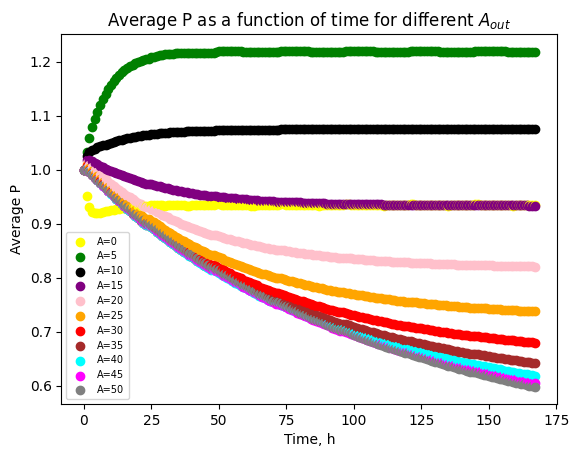

In [27]:
plt.figure()
final_prom = []
for time in range (0,equidist):
    #print(time)
    promP = []
    promP = computePromPXI_time(P_n_aout,n_values,Aout_values,modelXi_solution,time)
    final_prom.append(promP)

    time_value = (time)*(tf/equidist)
        
    plt.scatter(time_value, promP[0], color='yellow')
    plt.scatter(time_value, promP[1], color='green')
    plt.scatter(time_value, promP[2], color='black')
    plt.scatter(time_value, promP[3], color='purple')
    plt.scatter(time_value, promP[4], color='pink')
    plt.scatter(time_value, promP[5], color='orange')
    plt.scatter(time_value, promP[6], color='red')
    plt.scatter(time_value, promP[7], color='brown')
    plt.scatter(time_value, promP[8], color='cyan')
    plt.scatter(time_value, promP[9], color='magenta')
    plt.scatter(time_value, promP[10], color='gray')

plt.legend(['A=0', 'A=5', 'A=10', 'A=15', 'A=20', 'A=25', 'A=30', 'A=35', 'A=40', 'A=45', 'A=50'],prop={'size': 7})
plt.title('Average P as a function of time for different $A_{out}$')
plt.xlabel('Time, h')
plt.ylabel('Average P')

RECURRENTE PARA CALCULAR POR 24H CON AVERAGE P PREVIO

In [21]:
n_values = np.linspace(1, 10, 10)
Aout_values = np.linspace(0, 50, 11)
landa0 = 0.43
tf_or = 24
equidist_or = 24
initial_conditions_PA = [1, 0]  
P_n_aout,A_n_aout = computeAPnaout(model2,n_values,Aout_values,landa0,const_mean,tf_or,initial_conditions_PA,equidist_or)
print(np.shape(P_n_aout))
print(np.shape(A_n_aout))

print(P_n_aout[0][0][-1])

init = 0
initial_conditions_Xi = [1,init,init,init,init,init,init,init,init,init]
final_prom2 = []
for lap in range (1,8):
    
    tf = lap*tf_or
    equidist = lap*equidist_or
    
    modelXi_solution = []
    if lap==1:
        modelXi_solution = computeModelxidot(tf,A_n_aout,Aout_values,initial_conditions_Xi,equidist,deltaMin,deltaMay,landa0,klanda)
    else:
        t_span_Xi = [0, tf]
        for i in range(0,len(Aout_values)):
            sol = solve_ivp(modelxidot3,t_span_Xi,initial_conditions_Xi,args=(Mij, A_n_aout, i, landa0, klanda),t_eval=np.linspace(0, tf, equidist))
            modelXi_solution.append([sol.y[0],sol.y[1],sol.y[2],sol.y[3],sol.y[4],sol.y[5],sol.y[6],sol.y[7],sol.y[8],sol.y[9]])
    

    modelXi_solution = normalize_modelXI(modelXi_solution)
    promP = computePromPXI_time(P_n_aout,n_values,Aout_values,modelXi_solution,-1)
    final_prom2.append(promP)

    #Compute new value equilibrium point of P
    k1 ,k2, phi_in ,phi_out , v , km , klanda , alphaBeta = const_mean
    t_span_PA = [0, tf_or]

    P_n_aout_add = []
    A_n_aout_add = []
    for i in range(0,len(Aout_values)):
        Pcurrent = []
        Acurrent = []
        for j in range(0,len(n_values)):
            #[promP[i],A_n_aout[i][j][-1]
            sol = solve_ivp(model2, t_span_PA, [promP[i],A_n_aout[i][j][-1]], args=(n_values[j],k1,k2, phi_in, phi_out, Aout_values[i], v, km, klanda, landa0, alphaBeta), t_eval=np.linspace(0, tf_or, equidist_or))
            #print(i,j)
            Pcurrent.append(sol.y[0])
            Acurrent.append(sol.y[1])
        P_n_aout_add.append(Pcurrent)
        A_n_aout_add.append(Acurrent)


    for a in range(0,len(Aout_values)):
        for n in range(0,len(n_values)):
            P_n_aout[a][n] = np.append(P_n_aout[a][n], P_n_aout_add[a][n])
            A_n_aout[a][n] = np.append(A_n_aout[a][n], A_n_aout_add[a][n])
    
    print('lap'+str(lap))
    print(np.shape(P_n_aout))
    print(np.shape(P_n_aout))

 

print(np.shape(modelXi_solution))



(11, 10, 24)
(11, 10, 24)
0.9003099161421351
lap1
(11, 10, 48)
(11, 10, 48)
lap2
(11, 10, 72)
(11, 10, 72)
lap3
(11, 10, 96)
(11, 10, 96)
lap4
(11, 10, 120)
(11, 10, 120)
lap5
(11, 10, 144)
(11, 10, 144)
lap6
(11, 10, 168)
(11, 10, 168)
lap7
(11, 10, 192)
(11, 10, 192)
(11, 10, 168)


Text(0, 0.5, 'Average P')

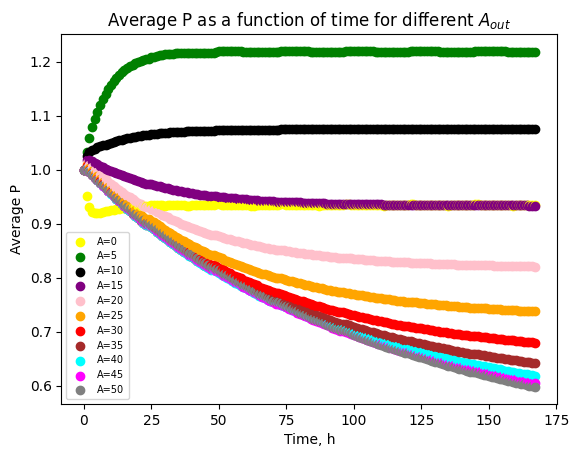

In [22]:
plt.figure()
final_prom = []
for time in range (0,equidist):
    #print(time)
    promP = []
    promP = computePromPXI_time(P_n_aout,n_values,Aout_values,modelXi_solution,time)
    final_prom.append(promP)

    time_value = (time)*(tf_or/equidist_or)
        
    plt.scatter(time_value, promP[0], color='yellow')
    plt.scatter(time_value, promP[1], color='green')
    plt.scatter(time_value, promP[2], color='black')
    plt.scatter(time_value, promP[3], color='purple')
    plt.scatter(time_value, promP[4], color='pink')
    plt.scatter(time_value, promP[5], color='orange')
    plt.scatter(time_value, promP[6], color='red')
    plt.scatter(time_value, promP[7], color='brown')
    plt.scatter(time_value, promP[8], color='cyan')
    plt.scatter(time_value, promP[9], color='magenta')
    plt.scatter(time_value, promP[10], color='gray')

plt.legend(['A=0', 'A=5', 'A=10', 'A=15', 'A=20', 'A=25', 'A=30', 'A=35', 'A=40', 'A=45', 'A=50'],prop={'size': 7})
plt.title('Average P as a function of time for different $A_{out}$') #$\delta$ = ' + str(deltaMin)
plt.xlabel('Time, h')
plt.ylabel('Average P')

24
48
72
96
120
144


Text(0, 0.5, 'Average P')

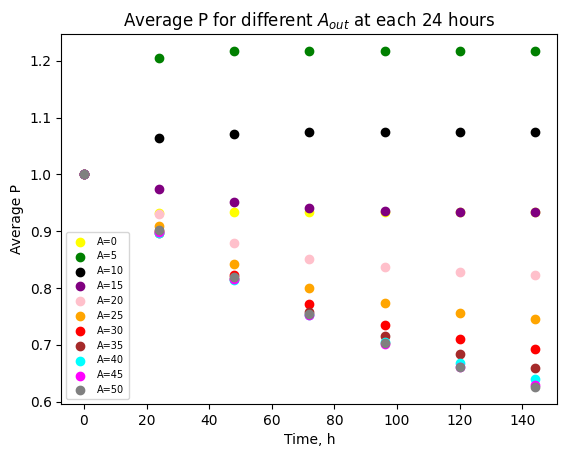

In [23]:
plt.figure()
final_prom = []
moddd = 23
time = 0
for j in range (0,7):
    #print(time)
    promP = []
    if j == 0:
        promP = computePromPXI_time(P_n_aout,n_values,Aout_values,modelXi_solution,0)
        plt.scatter(0, promP[0], color='yellow')
        plt.scatter(0, promP[1], color='green')
        plt.scatter(0, promP[2], color='black')
        plt.scatter(0, promP[3], color='purple')
        plt.scatter(0, promP[4], color='pink')
        plt.scatter(0, promP[5], color='orange')
        plt.scatter(0, promP[6], color='red')
        plt.scatter(0, promP[7], color='brown')
        plt.scatter(0, promP[8], color='cyan')
        plt.scatter(0, promP[9], color='magenta')
        plt.scatter(0, promP[10], color='gray')

    else:
        time = time + 24
        promP = computePromPXI_time(P_n_aout,n_values,Aout_values,modelXi_solution,time-1)

        final_prom.append(promP)
        print(time)
        time_value = (time)*(tf_or/equidist_or)
        #print(time%moddd)

        plt.scatter(time_value, promP[0], color='yellow')
        plt.scatter(time_value, promP[1], color='green')
        plt.scatter(time_value, promP[2], color='black')
        plt.scatter(time_value, promP[3], color='purple')
        plt.scatter(time_value, promP[4], color='pink')
        plt.scatter(time_value, promP[5], color='orange')
        plt.scatter(time_value, promP[6], color='red')
        plt.scatter(time_value, promP[7], color='brown')
        plt.scatter(time_value, promP[8], color='cyan')
        plt.scatter(time_value, promP[9], color='magenta')
        plt.scatter(time_value, promP[10], color='gray')


plt.legend(['A=0', 'A=5', 'A=10', 'A=15', 'A=20', 'A=25', 'A=30', 'A=35', 'A=40', 'A=45', 'A=50'],prop={'size': 7})
plt.title('Average P for different $A_{out}$ at each 24 hours')
plt.xlabel('Time, h')
plt.ylabel('Average P')
